In [1]:
#pip install xlrd # data.xlsx dosyasından okuyabilmek icin 
#pip install openpyxl # data.xlsx dosyasından okuyabilmek icin 

In [2]:
#pip install mlxtend

In [3]:
import pandas as pd # veri işlemesi ve analizi için
import numpy as np # dizi işlemleri için 
import matplotlib.pyplot as plt # veri görselleştirmek için
import datetime as dt # zaman 
import seaborn as sns # istatistiksel çizimler için veri görselleştirme
import mlxtend # birliktelik kuralları için 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# 1. Başlık çalışma verisi olarak “data.xlsx” kullanılacaktır

In [4]:
data = pd.read_excel('data.xlsx') # data.xlsx dosyasindan veri okuduk

In [5]:
df = data.copy() #ana verime bir sey olmasin diye

# 2. Başlık tanımlayıcı veri analizinin yapılması

In [6]:
df.head() # okuyabildigimizi dogrulamak icin ilk 5 verisini goruntuledik

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.tail() # birkaç son satirina baktik

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [8]:
df.shape # satır sutün sayısını görüntüledik

(541909, 8)

In [9]:
df.columns # Sutunlari/nitelikleri gorduk

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
df.dtypes # nitelik tiplerini gorduk

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [11]:
df.info() # genel bilgi edindik 0 dan 541908'e kadar numaralandirilmis girdi, 
#her bir satirda null olmayan girdi sayisi 
#sutunlarin veri tipi bilgilerini elde ettik.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
print(df.isnull().sum().sort_values(ascending=False)) # eksik degerlerini sayisini ogrenip azalan sekilde siraladik

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64


In [13]:
print(df.describe()) # Sütunların istatiksel özeti merkezi egilim, dagilim

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [14]:
df.isnull().sum() # kac tane eksik veri var

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [15]:
df["CustomerID"].value_counts()  # null olmayan degerleri gosterir

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

# 3. Başlık veri görselleştirme ve ayrıntılı analizinin yapılması

In [20]:
df_c = df.groupby('Country').agg({'Quantity': lambda x: x.sum()})
print(df_c)

                      Quantity
Country                       
Australia                83653
Austria                   4827
Bahrain                    260
Belgium                  23152
Brazil                     356
Canada                    2763
Channel Islands           9479
Cyprus                    6317
Czech Republic             592
Denmark                   8188
EIRE                    142637
European Community         497
Finland                  10666
France                  110480
Germany                 117448
Greece                    1556
Hong Kong                 4769
Iceland                   2458
Israel                    4353
Italy                     7999
Japan                    25218
Lebanon                    386
Lithuania                  652
Malta                      944
Netherlands             200128
Norway                   19247
Poland                    3653
Portugal                 16180
RSA                        352
Saudi Arabia                75
Singapor

In [21]:
df_c = pd.DataFrame(df_c)

In [22]:
df_c.head()

,Quantity
Country,
Australia,83653
Austria,4827
Bahrain,260
Belgium,23152
Brazil,356


# 4. Başlık veri ön işleme

In [23]:
df.isna().sum() # Boş değerlerin oluşumunu kontrol ederiz

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [24]:
df.dropna(inplace=True) # boş değere sahip tüm satırlrı bırakırız
len(df)

406829

In [25]:
#InvoiceNo sütununu dizeye dönüştür
df["InvoiceNo"] = df["InvoiceNo"].astype('str')

#"C" içeren faturaların bulunduğu satırları kaldır
df = df[~df["InvoiceNo"].str.contains("C")]

len(df)

397924

In [26]:
#Ülke başına işlemlerin dağılımını kontrol et.
top10 = df["Country"].value_counts().head(10)
top10

United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Netherlands         2363
Belgium             2031
Switzerland         1842
Portugal            1462
Australia           1185
Name: Country, dtype: int64

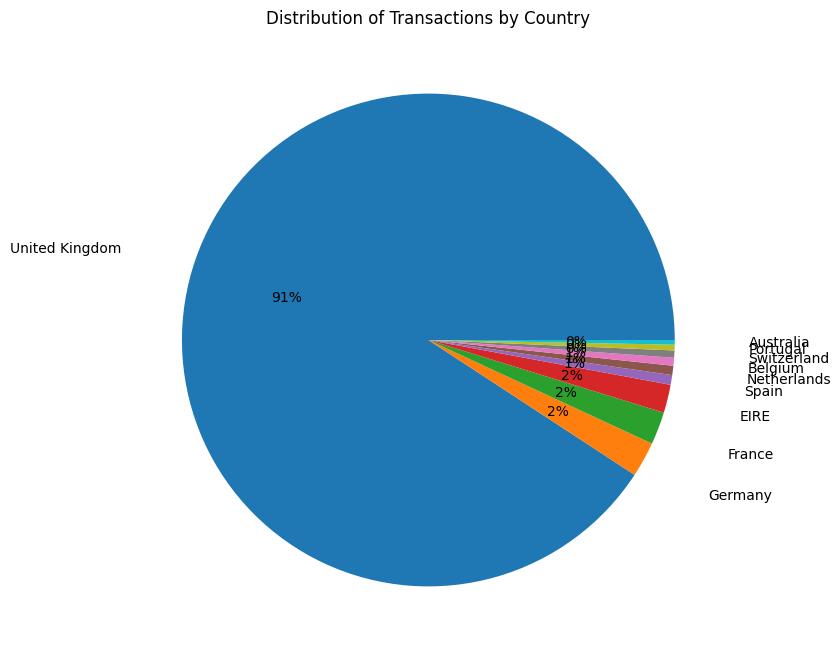

In [27]:
#İşlemlerin dağılımını göstermek için bir pasta grafik oluşturun
plt.figure(figsize=[8,8])
plt.pie(top10,labels=top10.index, autopct = '%0.0f%%',labeldistance=1.3)
plt.title("Distribution of Transactions by Country")
plt.show()

In [28]:
#UK fazla çıktığı için onunla devam edeceğiz

# 5. Veri setinin birliktelik kuralları analizinin yapılması

In [29]:
#Veri çerçevesini gruplandır, topla, yığınını kaldır ve dizini ayarla
#Birliktelik kurallarımı description niteliğime göre oluşturuyorum.
basket = df[df['Country'] =="United Kingdom"]\
        .groupby(['InvoiceNo', 'Description'])["Quantity"]\
        .sum().unstack()\
        .reset_index().fillna(0)\
        .set_index("InvoiceNo")

basket.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Fonksiyon oluşturalım
def encode_values(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

#İşlevi verilere uygula
basket_encoded = basket.applymap(encode_values)

basket_encoded

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#filteri yalnızca 2 veya daha fazla öğe içeren faturalar için uyguluyoruz
basket_filtered = basket_encoded[(basket_encoded > 0).sum(axis=1) >= 2]

basket_filtered

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Apriori algoritmasının uygulanması
#Sık kullanılan öğe kümelerini oluştur
frequent_itemsets = apriori(basket_filtered, min_support=0.03, use_colnames=True).sort_values("support",ascending=False)
frequent_itemsets.head(10)

C:\Users\Simge\anaconda3\envs\Python37\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:115: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


,support,itemsets
99,0.121358,(WHITE HANGING HEART T-LIGHT HOLDER)
44,0.093197,(JUMBO BAG RED RETROSPOT)
80,0.090466,(REGENCY CAKESTAND 3 TIER)
6,0.084417,(ASSORTED COLOUR BIRD ORNAMENT)
71,0.082986,(PARTY BUNTING)
58,0.072841,(LUNCH BAG RED RETROSPOT)
86,0.064971,(SET OF 3 CAKE TINS PANTRY DESIGN )
52,0.064646,(LUNCH BAG BLACK SKULL.)
69,0.061004,(PAPER CHAIN KIT 50'S CHRISTMAS )
64,0.060939,(NATURAL SLATE HEART CHALKBOARD )


In [33]:
# Birliktelik kurallarının uygulanması
assoc_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values("lift",ascending=False).reset_index(drop=True)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.039802,0.043900,0.030957,0.777778,17.717202,0.029210,4.302452
1,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.043900,0.039802,0.030957,0.705185,17.717202,0.029210,3.256952
2,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.072841,0.055086,0.030632,0.420536,7.634188,0.026620,1.630668
3,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.055086,0.072841,0.030632,0.556080,7.634188,0.026620,2.088574
4,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.093197,0.052680,0.032908,0.353105,6.702899,0.027999,1.464412
5,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.052680,0.093197,0.032908,0.624691,6.702899,0.027999,2.416152
6,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.064646,0.072841,0.031478,0.486922,6.684737,0.026769,1.807051
7,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.072841,0.064646,0.031478,0.432143,6.684737,0.026769,1.647164
